###Assignment 3
###Rohan Sanjay Patil--21BLC1085

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1 Loading the dataset
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#2 Perform the below observations


###Univariate Analysis

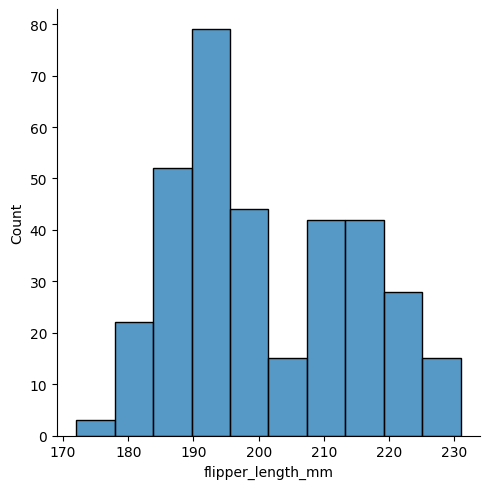

In [3]:
sns.displot(df.flipper_length_mm)

<ipython-input-4-4b07ffb4fe44>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

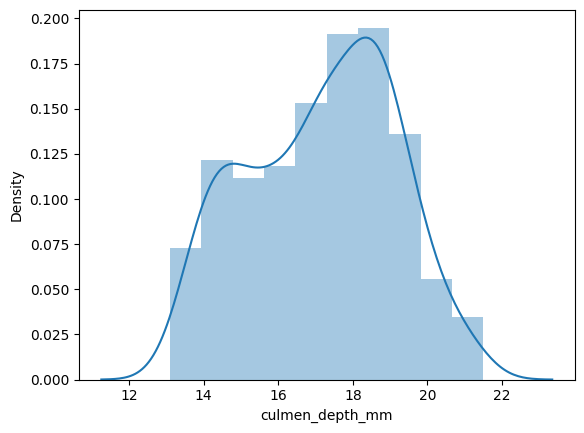

In [4]:
sns.distplot(df.culmen_depth_mm)

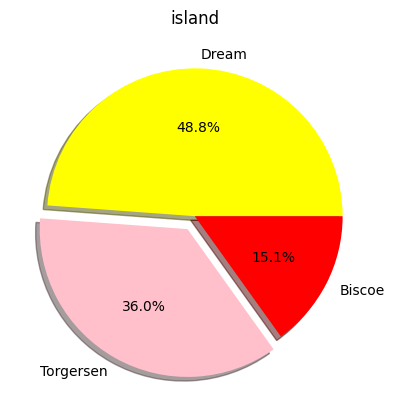

In [5]:
plt.pie(df.island.value_counts(),[0,0.1,0],labels=['Dream','Torgersen','Biscoe'],autopct='%1.1f%%',shadow=True,colors=['Yellow','Pink','Red'])
plt.title('island')
plt.show()

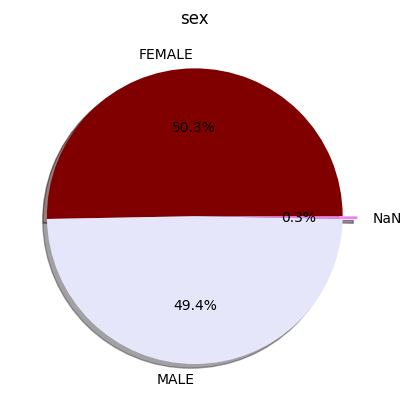

In [9]:
plt.pie(df.sex.value_counts(),[0,0,0.1],labels=['FEMALE','MALE','NaN'],autopct='%1.1f%%',shadow=True,colors=['Maroon','Lavender','Violet'])
plt.title('sex')
plt.show()

<Axes: ylabel='species'>

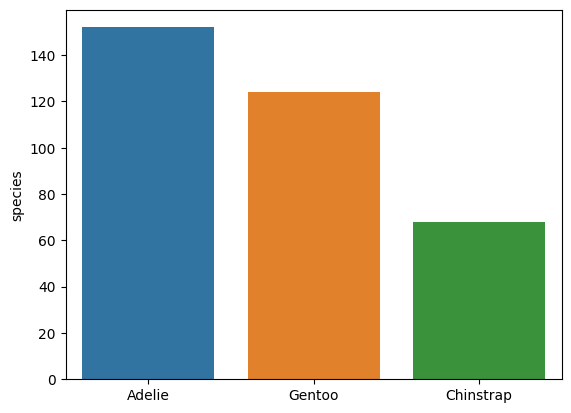

In [10]:
sns.barplot(x=df.species.value_counts().index,y=df.species.value_counts())

###Bivariate Analysis

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

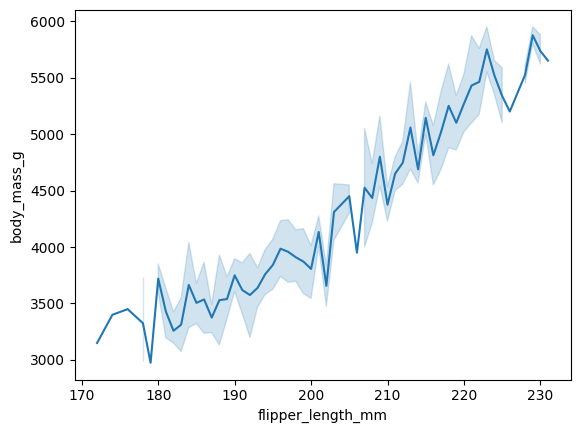

In [11]:
sns.lineplot(x=df.flipper_length_mm,y=df.body_mass_g)

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

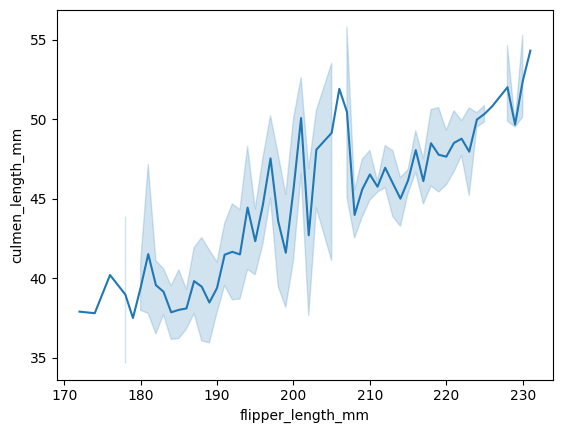

In [12]:
sns.lineplot(x=df.flipper_length_mm,y=df.culmen_length_mm)

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

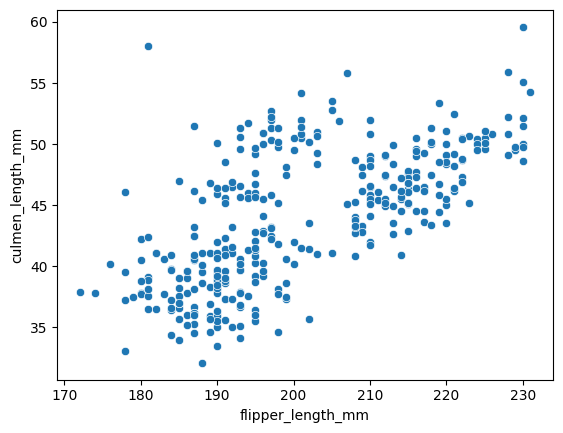

In [13]:
sns.scatterplot(x=df.flipper_length_mm,y=df.culmen_length_mm)

###Multivariate

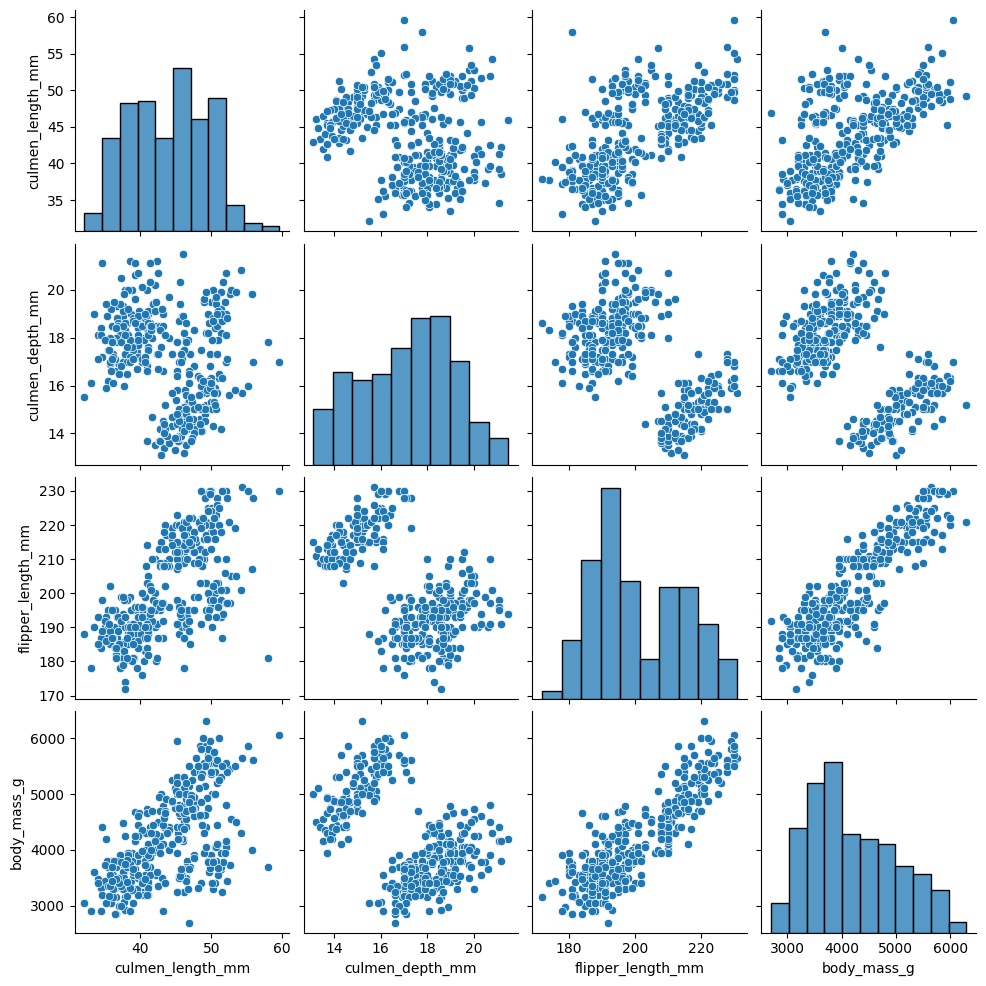

In [14]:
sns.pairplot(df)

In [15]:
#3 Perform descriptive statistics on the dataset
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [16]:
#4 Check for missing values and deal with them.
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [21]:
#5 Find the outliers and replace them outliers
q1=df.culmen_length_mm.quantile(0.25)#Q1
q3=df.culmen_length_mm.quantile(0.75)#Q2

<Axes: >

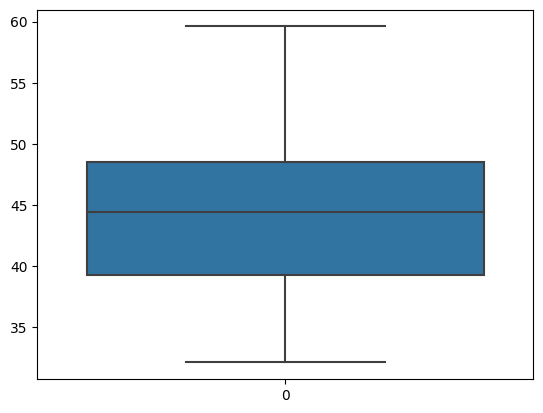

In [33]:
sns.boxplot(df.culmen_length_mm)

In [22]:
print(q1)
print(q3)

39.225
48.5


In [23]:
IQR=q3-q1

In [24]:
IQR

9.274999999999999

In [25]:
upper_limit=q3+1.5*IQR
upper_limit

62.412499999999994

In [26]:
lower_limit=q1-1.5*IQR
lower_limit

25.312500000000004

In [27]:
df.median()

<ipython-input-27-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [34]:
df['culmen_length_mm']=np.where(df['culmen_length_mm']>upper_limit,30,df['culmen_length_mm'])

<Axes: >

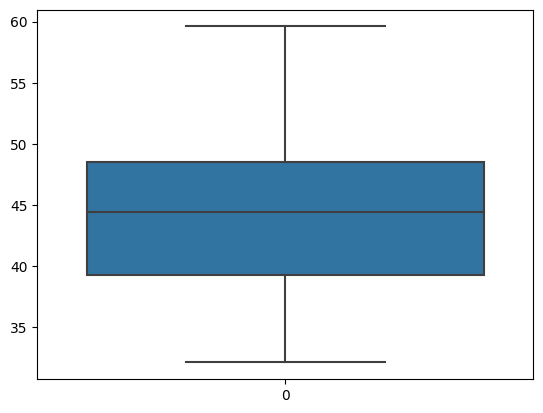

In [35]:
sns.boxplot(df.culmen_length_mm)

In [36]:
df.shape

(344, 7)

In [37]:
#6 Check the correlation of independent variables with the target
correlation_matrix=df.corr()
correlation_with_target=correlation_matrix['body_mass_g']


<ipython-input-37-ccf538e25d09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


In [38]:
correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [39]:
correlation_with_target

culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
flipper_length_mm    0.871202
body_mass_g          1.000000
Name: body_mass_g, dtype: float64

In [41]:
#7 Check for categorical columns and perform encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [44]:
df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)

In [45]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,MALE
1,0,2,39.5,17.4,186.0,3800.0,FEMALE
2,0,2,40.3,18.0,195.0,3250.0,FEMALE
3,0,2,NaN,NaN,NaN,NaN,NaN
4,0,2,36.7,19.3,193.0,3450.0,FEMALE


In [47]:
df_main=pd.get_dummies(df,columns=['sex'])
df_main.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,0,2,39.1,18.7,181.0,3750.0,0,0,1
1,0,2,39.5,17.4,186.0,3800.0,0,1,0
2,0,2,40.3,18.0,195.0,3250.0,0,1,0
3,0,2,NaN,NaN,NaN,NaN,0,0,0
4,0,2,36.7,19.3,193.0,3450.0,0,1,0


In [48]:
df_main.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
species,1.000000,-0.635659,0.731369,-0.744076,0.854307,0.750491,0.065458,-0.010240,0.010916
island,-0.635659,1.000000,-0.353647,0.571035,-0.565825,-0.561515,-0.049352,-0.002893,-0.026857
culmen_length_mm,0.731369,-0.353647,1.000000,-0.235053,0.656181,0.595110,0.005742,-0.323210,0.348378
culmen_depth_mm,-0.744076,0.571035,-0.235053,1.000000,-0.583851,-0.471916,-0.039852,-0.355333,0.368696
flipper_length_mm,0.854307,-0.565825,0.656181,-0.583851,1.000000,0.871202,0.062035,-0.244215,0.251283
body_mass_g,0.750491,-0.561515,0.595110,-0.471916,0.871202,1.000000,0.045528,-0.409315,0.422023
sex_.,0.065458,-0.049352,0.005742,-0.039852,0.062035,0.045528,1.000000,-0.051840,-0.052753
sex_FEMALE,-0.010240,-0.002893,-0.323210,-0.355333,-0.244215,-0.409315,-0.051840,1.000000,-0.938024
sex_MALE,0.010916,-0.026857,0.348378,0.368696,0.251283,0.422023,-0.052753,-0.938024,1.000000


<Axes: >

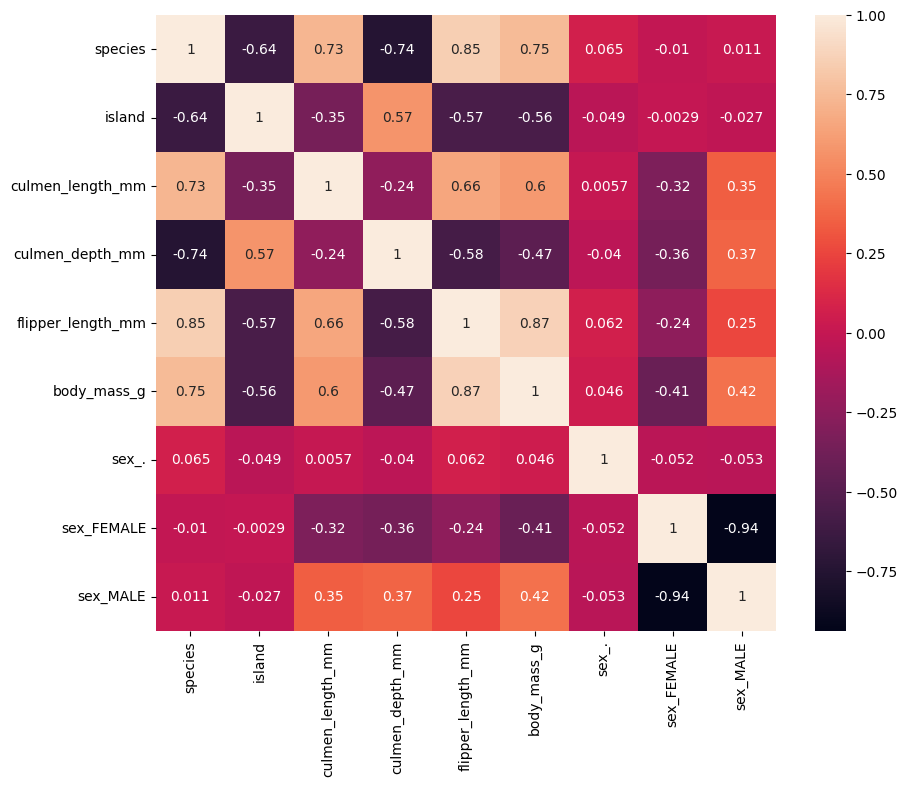

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot=True)

In [51]:
df_main.corr().body_mass_g.sort_values(ascending=False)

body_mass_g          1.000000
flipper_length_mm    0.871202
species              0.750491
culmen_length_mm     0.595110
sex_MALE             0.422023
sex_.                0.045528
sex_FEMALE          -0.409315
culmen_depth_mm     -0.471916
island              -0.561515
Name: body_mass_g, dtype: float64

In [53]:
#8 Split the data into dependent and independent variables
y=df_main['body_mass_g']
y

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [54]:
x=df_main.drop(columns=['body_mass_g'],axis=1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex_.,sex_FEMALE,sex_MALE
0,0,2,39.1,18.7,181.0,0,0,1
1,0,2,39.5,17.4,186.0,0,1,0
2,0,2,40.3,18.0,195.0,0,1,0
3,0,2,NaN,NaN,NaN,0,0,0
4,0,2,36.7,19.3,193.0,0,1,0


In [55]:
#9 Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [56]:
X_scaled= pd.DataFrame(scale.fit_transform(x),columns=x.columns)
X_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex_.,sex_FEMALE,sex_MALE
0,0.0,1.0,0.254545,0.666667,0.152542,0.0,0.0,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.0,1.0,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.0,1.0,0.0
3,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.0,1.0,0.0


In [57]:
#10 split the data training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [58]:
#11 check the training and testing data shape
x_train.shape

(240, 8)

In [59]:
x_test.shape

(104, 8)

In [60]:
y_train.shape

(240,)

In [61]:
y_test.shape

(104,)